### PROCESAMIENTO DE DATOS DE MAIZ CORDOBA - EXCELLENCE IN AGRONOMY

Carga de librerias

In [43]:
"""
Created on Thu Jun  1 08:32:21 2023
@author: OEstrada
"""

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir(r'D:\OneDrive - CGIAR\CIAT\[2023] EXCELLENCE IN AGRONOMY\BASES DE DATOS\SIRIA_FULL_DIC_2021')

Funcion para graficos descriptivos

In [44]:
def desc(data, var):
    # Estilo graficos    
    sns.set_style("darkgrid") #whitegrid
    col1='#1f77b4'
    col2='#1f77b4'
    
    # Dispersion y boxplot para cada variable
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(12,6)
    ax[0].set_title('Dispersión', size=13, fontweight='bold')
    ax[1].set_title('Boxplot', size=13, fontweight='bold')
    if data[var].dtype == 'O':
        sns.stripplot(data=data, x=var, y='RDT', color=col1, ax=ax[0])
        sns.boxplot(data=data, x=var, y='RDT', color=col2, ax=ax[1]) # orient='v'
    else:
        sns.scatterplot(data=data, x=var, y='RDT', color=col1, ax=ax[0])
        sns.boxplot(data=data, x=var, color=col2, ax=ax[1]) # orient='v'
    plt.tight_layout()

1. Eventos Productivos

In [45]:
# Carga de datos y filtrado
eventos = pd.read_excel('Eventos Productivos.xlsx', sheet_name=0)
eventos = eventos.drop_duplicates()
eventos = eventos[eventos['DPTO FINCA'] == 'CÓRDOBA']
eventos = eventos[eventos['PROD_COSECHADO'] == 'Grano seco']

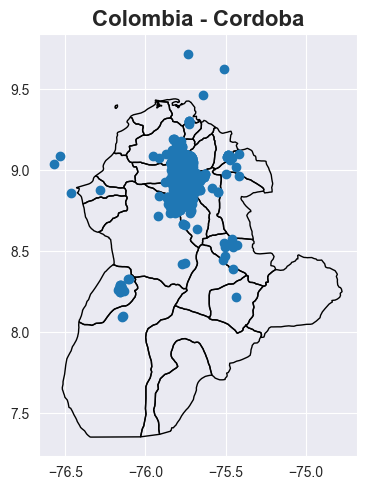

In [46]:
# Revision de coordenadas Cordoba
archivo_shapefile = r'D:\OneDrive - CGIAR\CIAT\[] SHAPEFILES\SUDAMERICA_ADM2\sudamerica_adm2.shp'
shapefile = gpd.read_file(archivo_shapefile)
shapefile = shapefile[(shapefile['ADM0'] == 'COLOMBIA') & (shapefile['ADM1'] == 'Cordoba')]

fig, ax = plt.subplots(figsize=(5, 5))
shapefile.plot(ax=ax, edgecolor='black', facecolor='none')
ax.scatter(eventos['LONG_LOTE'], eventos['LAT_LOTE'])
ax.set_title('Colombia - Cordoba', size=16, fontweight='bold')
plt.tight_layout()

# Eliminar los puntos fuera de Cordoba
eventos[eventos['LONG_LOTE'] < -76.4]
eventos = eventos[eventos['LONG_LOTE'] > -76.4]

eventos[eventos['LAT_LOTE'] > 9.4]
eventos = eventos[eventos['LAT_LOTE'] < 9.4]

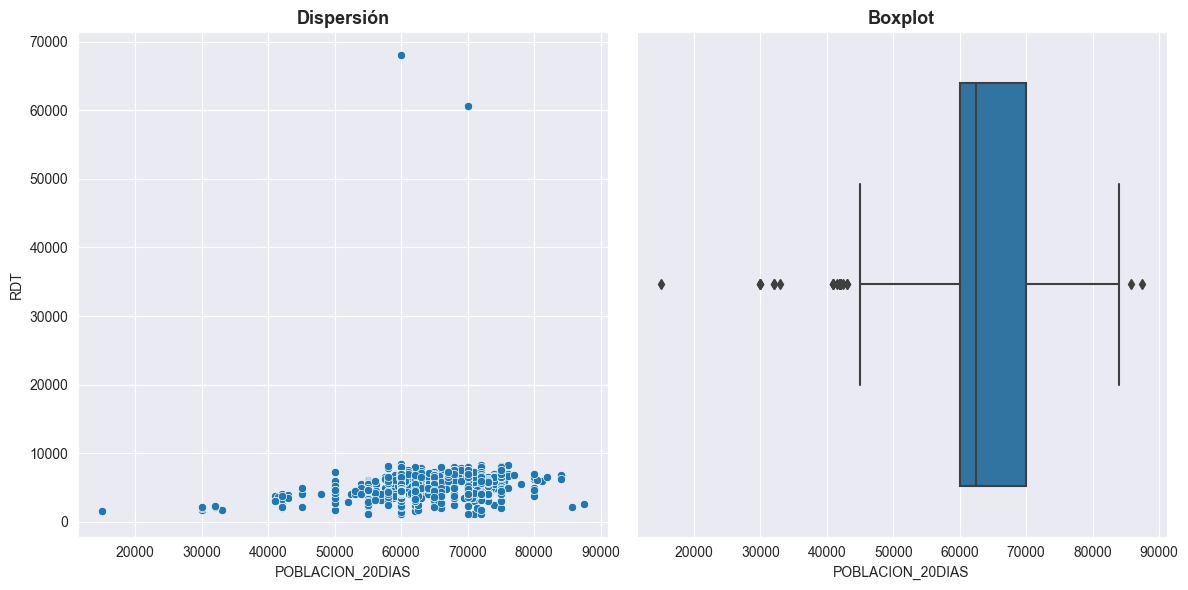

In [47]:
# Ajustes de variables
eventos['POBLACION_20DIAS'].describe()
desc(eventos, 'POBLACION_20DIAS')

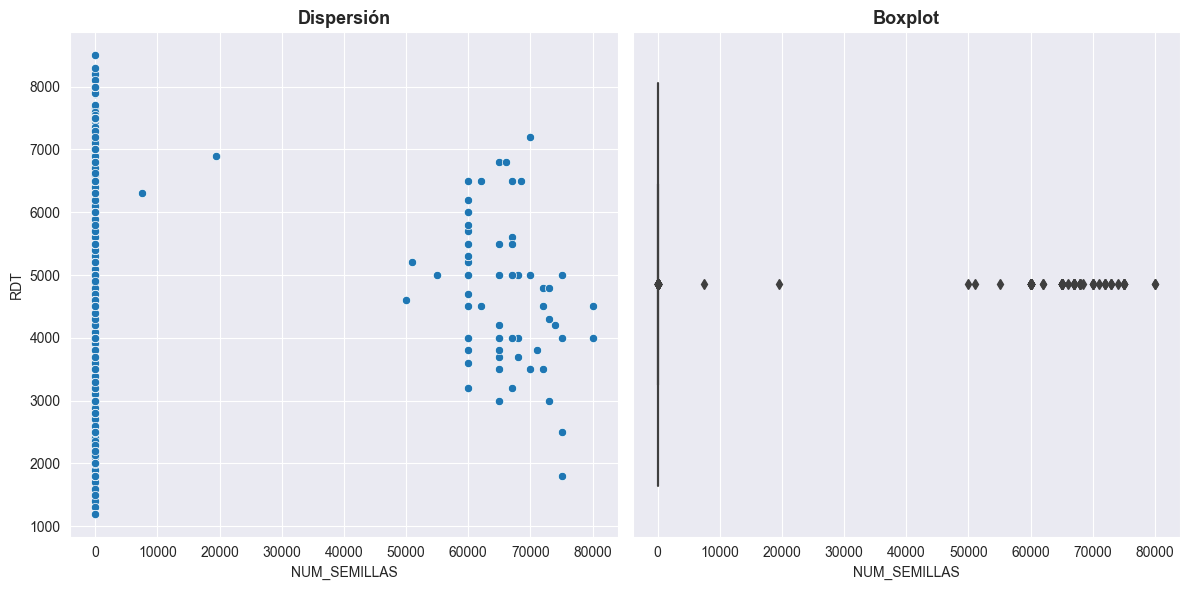

In [48]:
eventos[eventos['RDT'] > 20000]

# Correccion de tipografia
eventos.loc[264,'RDT'] = 6800
eventos.loc[270,'RDT'] = 6580

eventos = eventos[eventos['POBLACION_20DIAS'] >= 20000]
eventos.loc[eventos['MATERIAL_GENETICO'] == 'Otro', 'MATERIAL_GENETICO'] = eventos['NUEVO_MATERIAL_GENETICO']
eventos['CULT_ANT'].fillna(eventos['OTRO_CULT_ANT'], inplace=True)

desc(eventos, 'NUM_SEMILLAS')

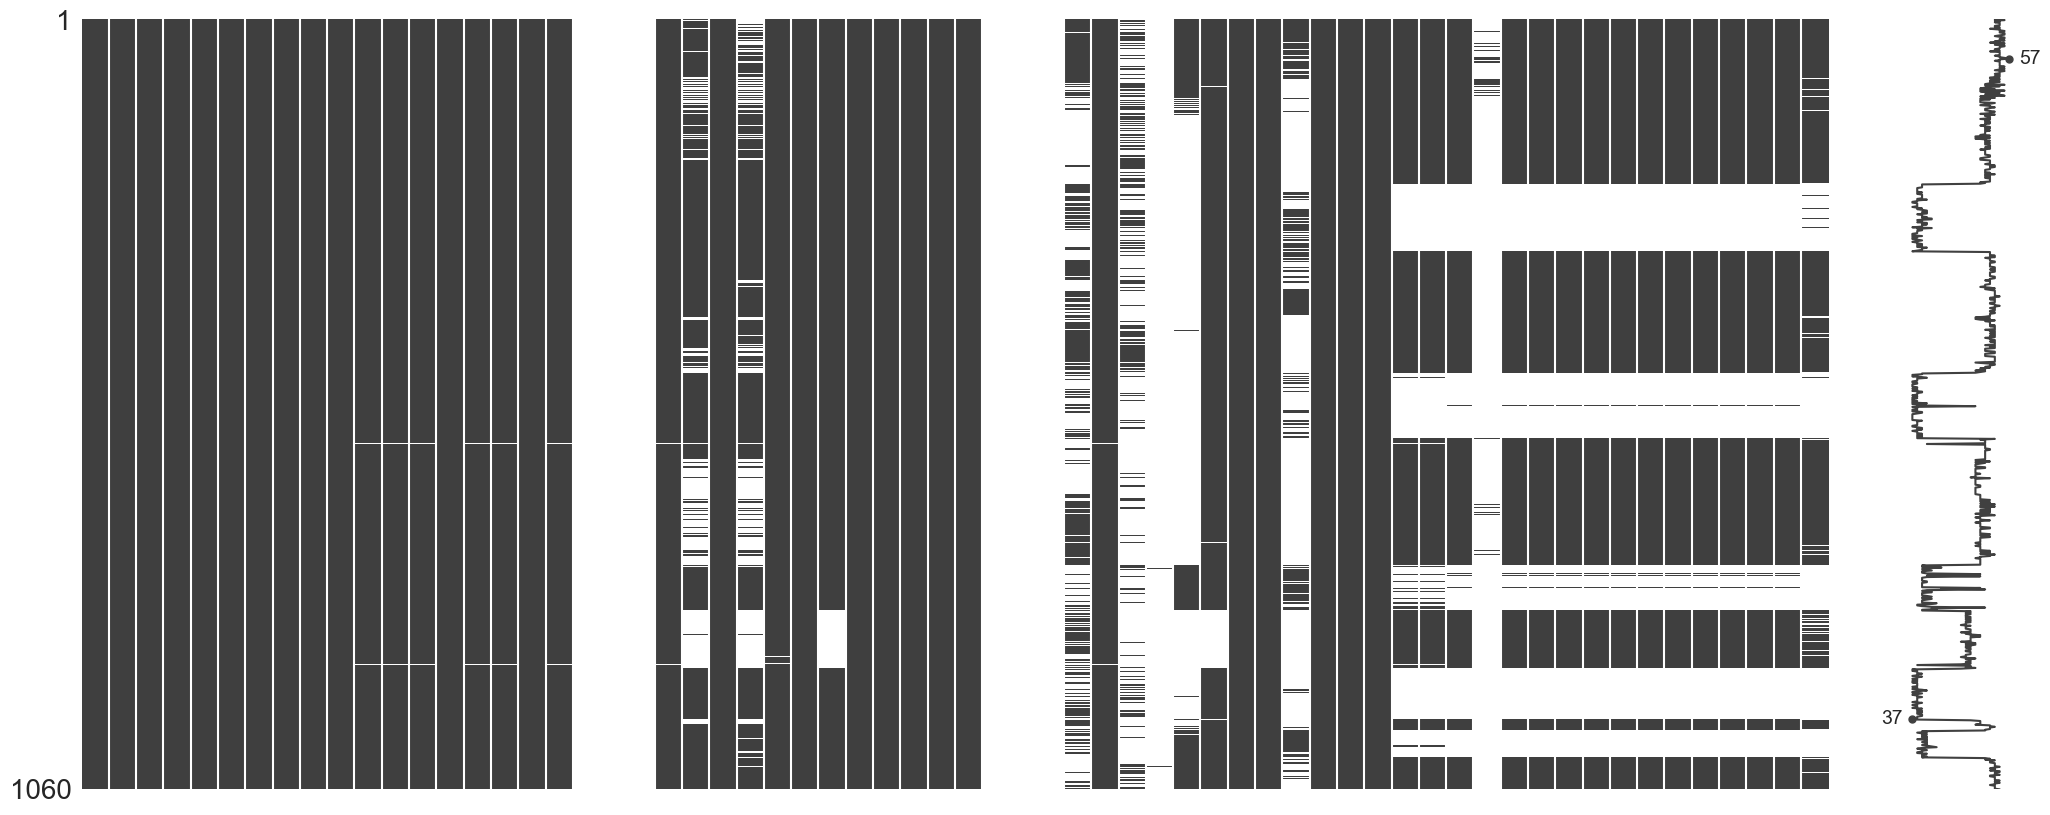

In [49]:
eventos['NUM_SEMILLAS'] = eventos['NUM_SEMILLAS'].apply(lambda x: x * 0.0003 if x > 5000 else x)

msno.matrix(eventos);

In [50]:
list(eventos)

eventos = eventos[['ID_CULTIVO', 'ID_LOTE', 'LAT_LOTE', 'LONG_LOTE', 'FECHA_SIEMBRA', 'TIPO_SIEMBRA',
                   'NUM_SEMILLAS', 'SEM_TRATADAS', 'TIPO_MATERIAL', 'MATERIAL_GENETICO', 'COLOR_ENDOSPERMO',
                   'DRENAJE', 'FECHA_EMERGENCIA', 'POBLACION_20DIAS',  'FECHA_FLORACION', 'METODO_COSECHA',
                   'FECHA_COSECHA', 'RDT']]

# Asumiendo que los NaN eran 0, sin drenaje
eventos['DRENAJE'] = eventos['DRENAJE'].fillna(0)

# Eliminacion de registros con datos faltantes
eventos = eventos.dropna()

# Agrupar materiales por empresa
print(eventos['MATERIAL_GENETICO'].unique())
print(eventos['MATERIAL_GENETICO'].value_counts())

['P3966 (Pioneer)' 'FNC-8610' 'DK7088' 'DK 234' 'FNC-8134' 'DK 234 YGRR'
 'FNC8502' 'FNC-8134 T' 'FNC-8610 T' 'SV-1035' 'FNC8134' 'SV 1035'
 'DK 415 YGRR' 'FNC 8134 T' 'P4082 (Pioneer)' 'FNC 8610 T' 'FNC 8610'
 'ADV 9339 (Syngenta)' 'FNC8610' 'FNC-8502' 'SV 7019' 'P 3966 WH'
 'SV - 7019' 'DK 234 VTPRO' 'SV - 1035' 'P 4082 WH' 'ADV 9293 (Syngenta)'
 'Cerato (Syngenta)' 'PIONEER 30F35 H' 1035 'ADT9293' 'ADT - 9293'
 'PIONEER 30F35 HRR' 'Sinko (Syngenta)' 'Impacto BT' 'SV-7019'
 'PIONEER 30F35' 'ADT-9293' 'ADT-9339' 'P1082 WH' 'SV 3243'
 'DK 7088 VTPRO' 'PIONEER 4082 WH ' 'PIONEER 4082 WH' 'Lucino'
 'PIONEER 4082WH' 'PAC 105' 'P3966' 'DK 234 VT PRO' 'PIONEER 30F32'
 'ADV 4339' 'P4082 WHR' 'P4082 WH' 'DK234 VTPRO' 'SV1035'
 'NK254 (Syngenta)' 'Impacto (Syngenta)' 'ICA V 305' 3969 ' DK 234 VT PRO'
 '3966 WH' 'Tropical Cis' 'Tropical' 'Synko' 'Status (Syngenta)'
 'DK 234 YGRR VTPRO' 'P 30F35 RR' 'P Electra' 'P3966 WH' 'P 3966 W'
 'Agrisure Impacto Viptera 3' 'ICA V 156' 'DK 234 RR' 'P3936 WH

In [51]:
# Correccion de nombres
eventos['MATERIAL_GENETICO'] = eventos['MATERIAL_GENETICO'].replace(to_replace = 1035, value='SV1035')
eventos['MATERIAL_GENETICO'] = eventos['MATERIAL_GENETICO'].replace(to_replace = 3969, value='NK3969')
eventos['MATERIAL_GENETICO'] = eventos['MATERIAL_GENETICO'].replace(to_replace = 7019, value='SV7019')
eventos['MATERIAL_GENETICO'] = eventos['MATERIAL_GENETICO'].replace(to_replace = 1430, value='AV1430')
eventos['MATERIAL_GENETICO'] = eventos['MATERIAL_GENETICO'].replace(to_replace = '3966 WH', value='P3966')
eventos['MATERIAL_GENETICO'] = eventos['MATERIAL_GENETICO'].replace(to_replace = '234 VTPro', value='DK234')
eventos['MATERIAL_GENETICO'] = eventos['MATERIAL_GENETICO'].str.replace('\s+', '', regex=True)
eventos.loc[eventos['MATERIAL_GENETICO'].str.startswith('P'), ['MATERIAL_GENETICO']] = 'PIONEER'
eventos.loc[eventos['MATERIAL_GENETICO'].str.startswith('DK'), ['MATERIAL_GENETICO']] = 'DEKALB'
eventos.loc[eventos['MATERIAL_GENETICO'].str.startswith('FNC'), ['MATERIAL_GENETICO']] = 'FENALCE'
eventos.loc[eventos['MATERIAL_GENETICO'].str.startswith('AD'), ['MATERIAL_GENETICO']] = 'ADVANTA'
eventos.loc[eventos['MATERIAL_GENETICO'].str.contains('SV', case=False, regex=False), ['MATERIAL_GENETICO']] = 'SEMIVALLE'
eventos.loc[eventos['MATERIAL_GENETICO'].str.contains('SYN', case=False, regex=False), ['MATERIAL_GENETICO']] = 'SYNGENTA'
eventos.loc[eventos['MATERIAL_GENETICO'].str.contains('IMPA', case=False, regex=False), ['MATERIAL_GENETICO']] = 'SYNGENTA'
eventos.loc[eventos['MATERIAL_GENETICO'].str.contains('LUCI', case=False, regex=False), ['MATERIAL_GENETICO']] = 'SYNGENTA'
eventos.loc[~eventos['MATERIAL_GENETICO'].isin(['PIONEER', 'DEKALB', 'FENALCE', 'ADVANTA', 'SEMIVALLE',
                                                'SYNGENTA']), ['MATERIAL_GENETICO']] = 'OTRO'

eventos['MATERIAL_GENETICO'].value_counts()

MATERIAL_GENETICO
PIONEER      381
DEKALB       315
SEMIVALLE    101
SYNGENTA      55
FENALCE       51
ADVANTA       51
OTRO          25
Name: count, dtype: int64

In [52]:
# Cambios de categorias y nombres de columnas
eventos['TIPO_SIEMBRA'] = eventos['TIPO_SIEMBRA'].replace({1: 'MECANIZADA', 3: 'MANUAL'})
eventos['METODO_COSECHA'] = eventos['METODO_COSECHA'].replace({1: 'MECANIZADA', 2: 'MANUAL'})
eventos['DRENAJE'] = eventos['DRENAJE'].replace({0: 'NO', 1: 'SI'})
eventos = eventos.rename(columns={'ID_CULTIVO': 'ID_EVENTO', 'NUM_SEMILLAS': 'CANT_SEMILLAS', 'POBLACION_20DIAS': 'POB_20D'})

# Filtro por duracion de ciclos
eventos['FECHA_FLORACION'].dtype
eventos['DIAS_FLOR'] = eventos['FECHA_FLORACION'] - eventos['FECHA_SIEMBRA']
eventos['DIAS_COS'] = eventos['FECHA_COSECHA'] - eventos['FECHA_SIEMBRA']

print(eventos[eventos['DIAS_FLOR'].dt.days < 30])
print(eventos[eventos['DIAS_FLOR'].dt.days > 60])
print(eventos[eventos['DIAS_COS'].dt.days < 100])
print(eventos[eventos['DIAS_COS'].dt.days > 150])

      ID_EVENTO  ID_LOTE  LAT_LOTE  LONG_LOTE FECHA_SIEMBRA TIPO_SIEMBRA  \
172        6590     6405  9.073578 -75.730014    2018-05-07   MECANIZADA   
4112       2098     1940  9.140778 -75.774972    2015-05-23   MECANIZADA   
4186       2628     2284  9.105083 -75.819444    2015-05-21   MECANIZADA   
4271       3302     3021  9.300333 -75.728694    2015-09-27       MANUAL   

      CANT_SEMILLAS SEM_TRATADAS      TIPO_MATERIAL MATERIAL_GENETICO  \
172            20.0           SI                OGM           FENALCE   
4112           20.0           NO            Hibrido            DEKALB   
4186           20.0           SI                OGM            DEKALB   
4271           13.0           NO  Semilla Campesina              OTRO   

     COLOR_ENDOSPERMO DRENAJE FECHA_EMERGENCIA  POB_20D FECHA_FLORACION  \
172          Amarillo      SI       2018-05-11  61000.0      2018-05-24   
4112           Blanco      NO       2015-05-27  60000.0      2015-06-15   
4186           Blanco      N

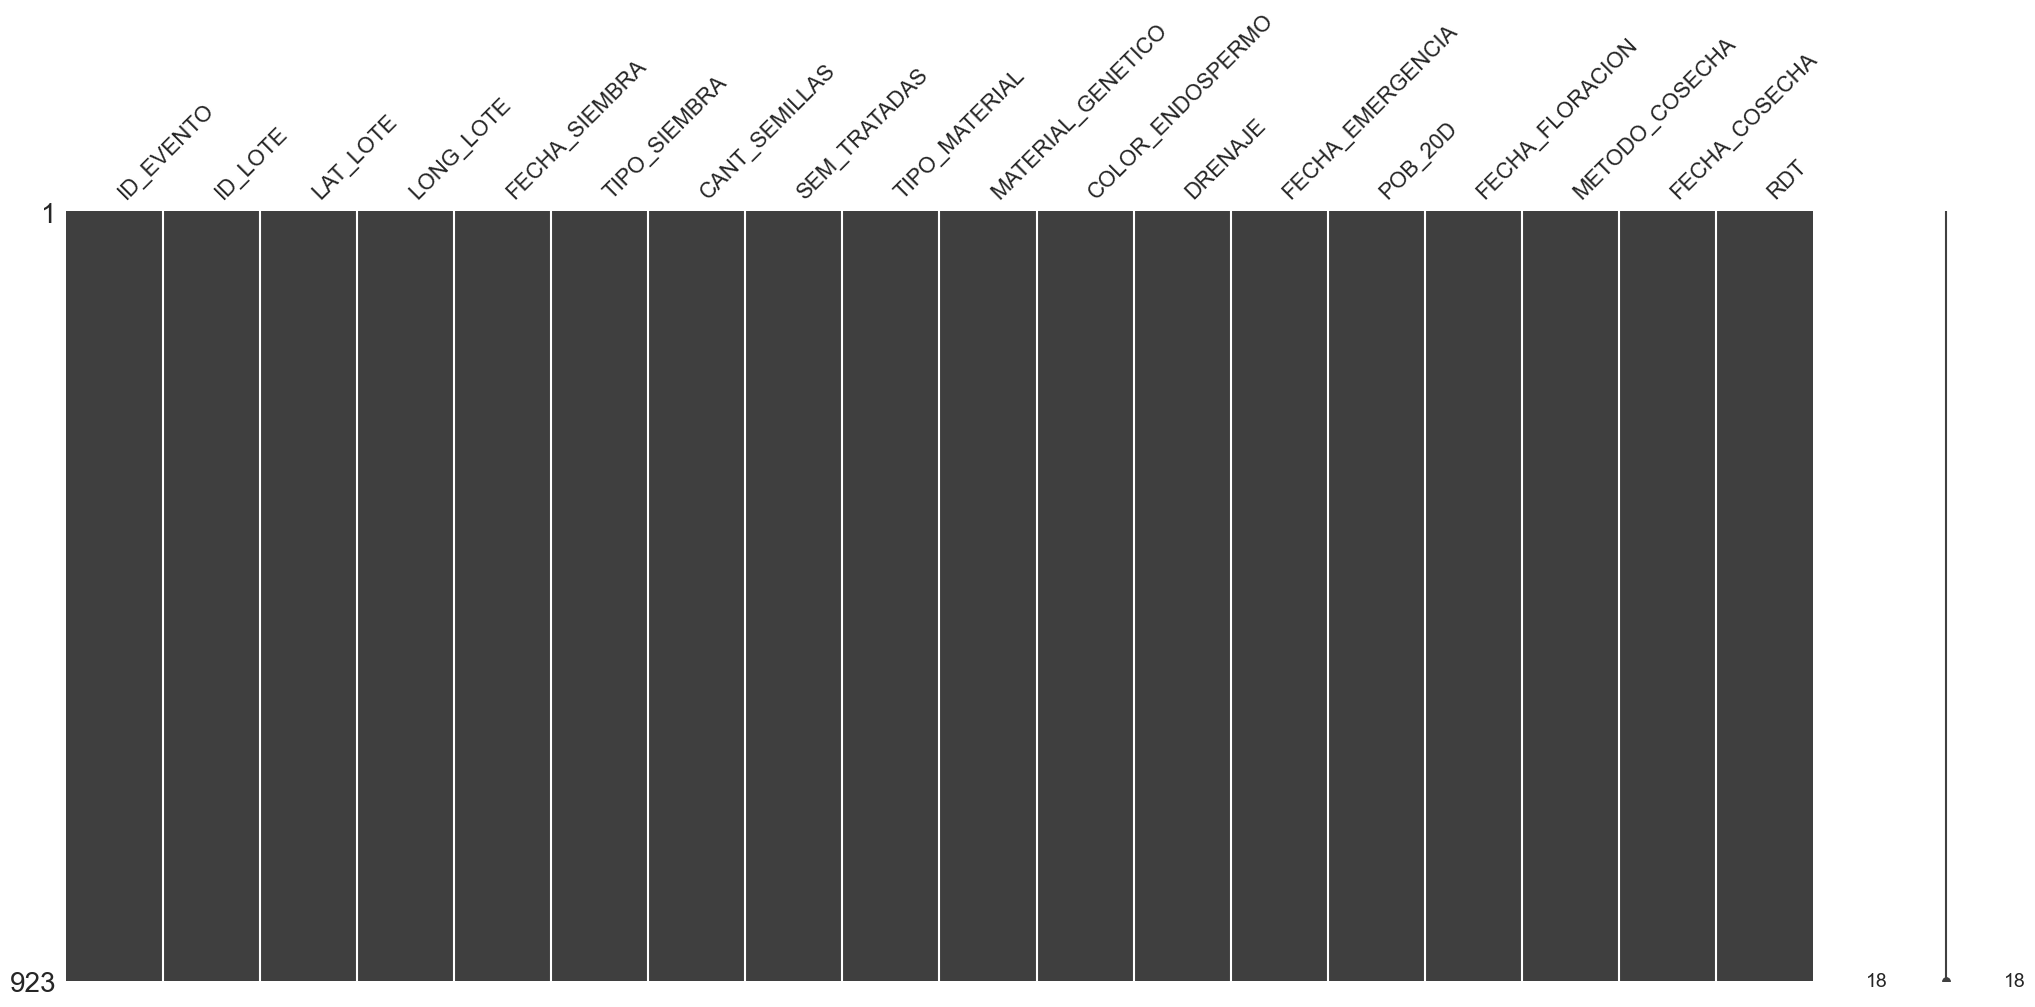

In [53]:
eventos = eventos.drop(eventos[(eventos['DIAS_FLOR'].dt.days < 30) | (eventos['DIAS_FLOR'].dt.days > 60)].index)
eventos = eventos.drop(eventos[(eventos['DIAS_COS'].dt.days < 100) | (eventos['DIAS_COS'].dt.days > 150)].index)
eventos = eventos.drop(['DIAS_FLOR', 'DIAS_COS'], axis=1)

msno.matrix(eventos);

data = eventos.copy()
del eventos

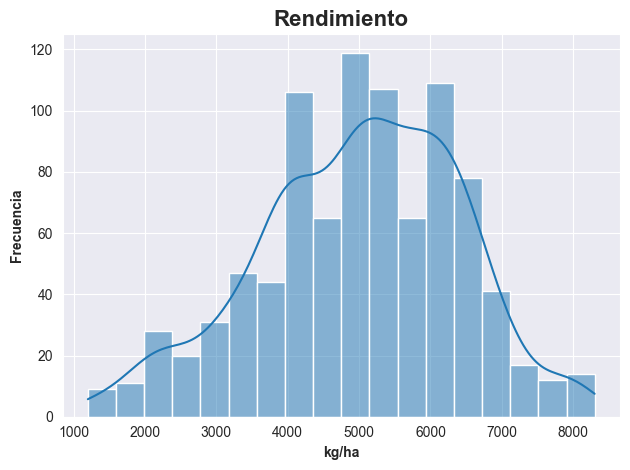

In [54]:
# Histograma de rendimiento
sns.histplot(data=data, x='RDT', kde=True)
plt.title('Rendimiento', size=16, fontweight='bold')
plt.xlabel('kg/ha', fontweight='bold')
plt.ylabel('Frecuencia', fontweight='bold')
plt.tight_layout()

2. Manejo de Rastrojos

In [55]:
rastrojos = pd.read_excel('Rastrojos.xlsx', sheet_name=0)
rastrojos = rastrojos[rastrojos['ID_EVENTO'].isin(data['ID_EVENTO'])]
rastrojos = rastrojos.drop_duplicates()
rastrojos['MANEJO_RAST'] = rastrojos.groupby('ID_EVENTO')['TIPO_RAS'].transform(lambda x: ', '.join(x))
rastrojos = rastrojos.drop_duplicates(subset='ID_EVENTO')

list(rastrojos)

['USUARIO',
 'ID_EVENTO',
 'PRODUCTOR',
 'PROD_CEDULA',
 'ID_PROD',
 'FECHA_RAS',
 'TIPO_RAS',
 'DESC',
 'COSTO_MANEJO_RASTROJO',
 'MANEJO_RAST']

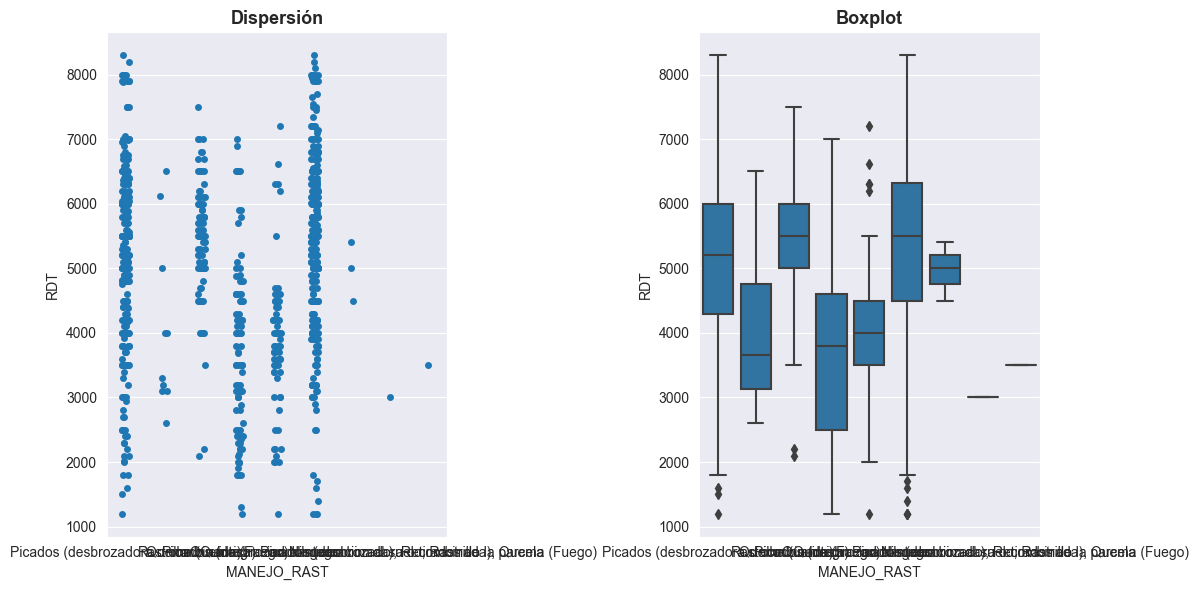

In [56]:
rastrojos = rastrojos[['ID_EVENTO', 'MANEJO_RAST']]
data = pd.merge(data, rastrojos, on='ID_EVENTO', how='left')

# Asumiendo que en los faltantes es que no se hizo la labor
data['MANEJO_RAST'] = data['MANEJO_RAST'].fillna('Ninguno')

desc(data, 'MANEJO_RAST')

del rastrojos

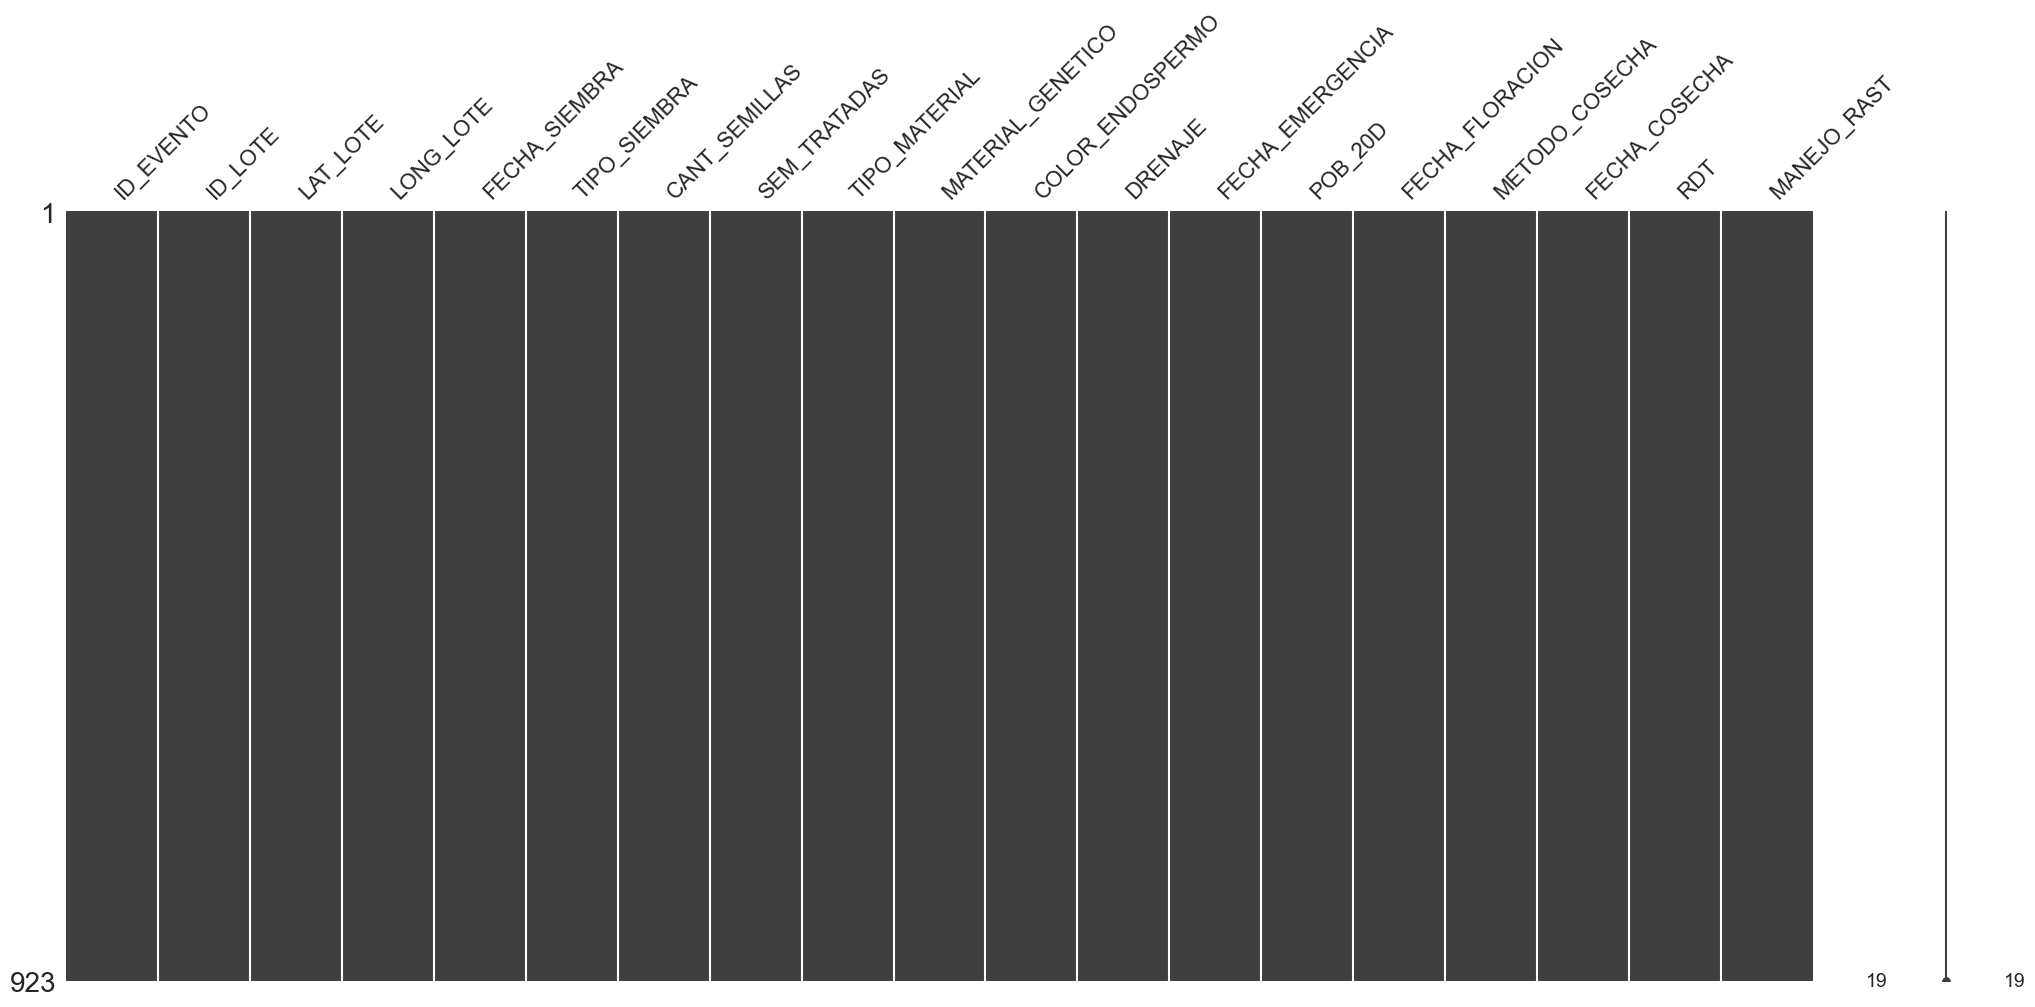

In [57]:
msno.matrix(data);

3. Preparaciones

In [58]:
preparaciones = pd.read_excel('Preparaciones.xlsx', sheet_name=0)
preparaciones = preparaciones[preparaciones['ID_EVENTO'].isin(data['ID_EVENTO'])]
preparaciones = preparaciones.drop_duplicates()
list(preparaciones)

['USUARIO',
 'ID_EVENTO',
 'PRODDUCTOR',
 'CEDULA_PROD',
 'ID_PRODUCT',
 'FECHA_PREP',
 'PROFUND_PREP',
 'DESCRIPCION',
 'COSTO_PREP',
 'TYP_PREP',
 'NUM_PASES']

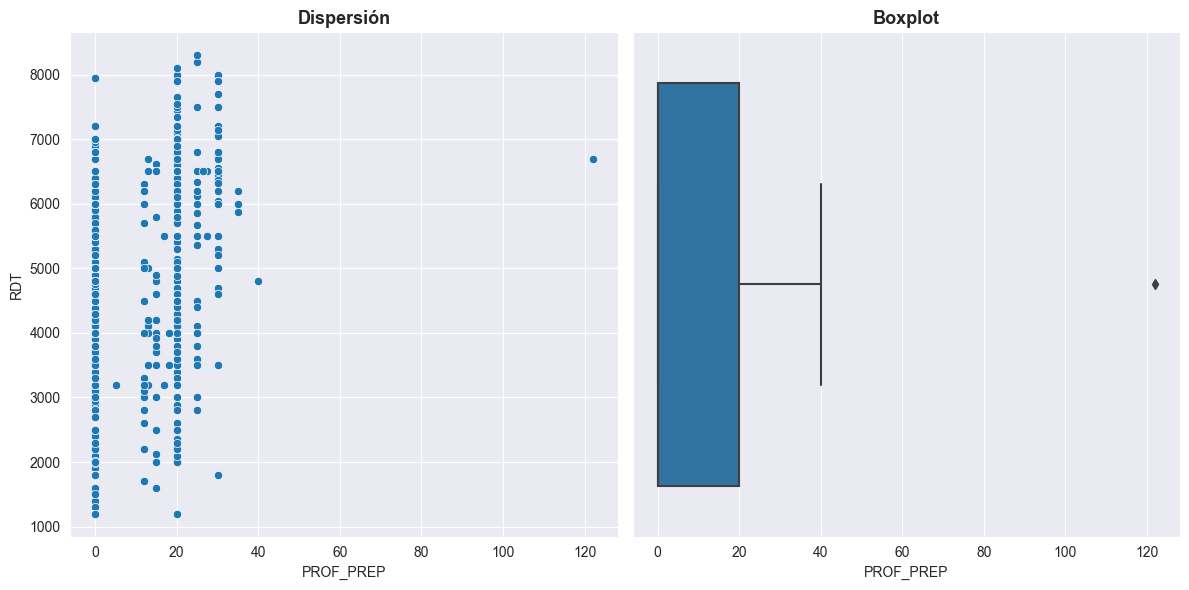

In [59]:
preparaciones['TIPO_PREP'] = preparaciones.groupby('ID_EVENTO')['TYP_PREP'].transform(lambda x: ', '.join(x))
preparaciones['PROF_PREP'] = preparaciones.groupby('ID_EVENTO')['PROFUND_PREP'].transform('mean')
preparaciones['NUM_PASES_PREP'] = preparaciones.groupby('ID_EVENTO')['NUM_PASES'].transform('sum')

preparaciones = preparaciones.drop_duplicates(subset='ID_EVENTO')

preparaciones = preparaciones[['ID_EVENTO', 'TIPO_PREP', 'NUM_PASES_PREP', 'PROF_PREP']]

data = pd.merge(data, preparaciones, on='ID_EVENTO', how='left')

# Asumiendo que en los faltantes es que no se hizo la labor
data['TIPO_PREP'] = data['TIPO_PREP'].fillna('Ninguna (siembra directa)')

# Llena profundidad y numero de pases faltantes con 0
data = data.fillna(0)
desc(data, 'PROF_PREP')

data = data[data['PROF_PREP'] < 60]

del preparaciones

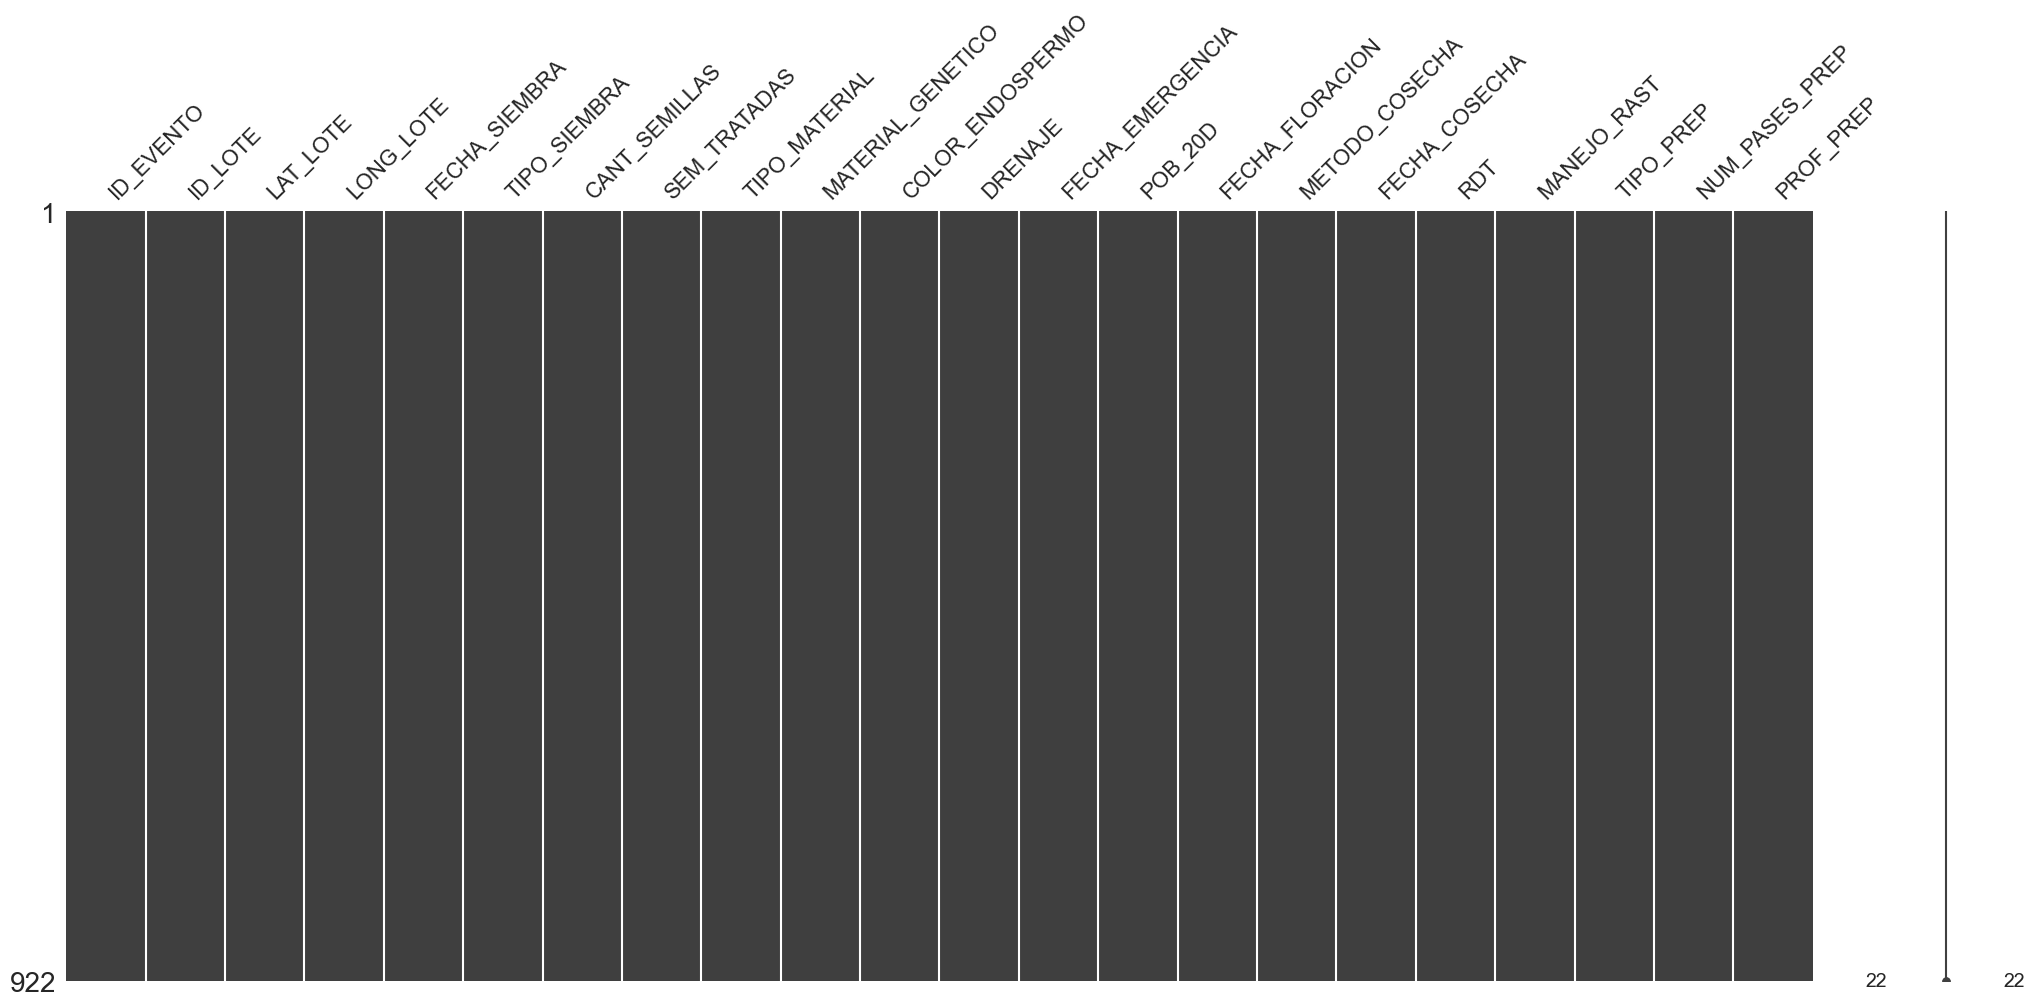

In [60]:
msno.matrix(data);

4. Fertilizaciones

In [61]:
fertilizaciones = pd.read_excel('Fertilizaciones.xlsx', sheet_name=0)
fertilizaciones = fertilizaciones[fertilizaciones['ID_EVENTO'].isin(data['ID_EVENTO'])]
fertilizaciones = fertilizaciones.drop_duplicates()
list(fertilizaciones)

['USUARIO',
 'ID_EVENTO',
 'PRODUCTOR',
 'PROD_CEDULA',
 'ID_PRODUCTOR',
 'DATE_FERTIL',
 'ID_ASO',
 'TIPO_FERTILIZ',
 'CANTIDAD_PROD_FERTI',
 'PROD_QUIM',
 'PROD_ORGANICO',
 'PROD_ENMIENDA',
 'N',
 'P',
 'K',
 'UNIDAD',
 'TIPO_APLICACION',
 'COMENTARIOS',
 'COSTO_APLICACION',
 'COSTO_PRODUCTO',
 'FORMA APLIC QUIMICA',
 'FORMA APLIC ENMIENDA',
 'FORMA APLIC ORGANICA']

In [62]:
fertilizaciones[['N', 'P', 'K']] = fertilizaciones[['N', 'P', 'K']].astype(float)
fertilizaciones['CANTIDAD_PROD_FERTI'].describe()
fertilizaciones[fertilizaciones['CANTIDAD_PROD_FERTI'] > 1000]['CANTIDAD_PROD_FERTI']

# Correccion de errores de digitacion
fertilizaciones['CANTIDAD_PROD_FERTI'] = fertilizaciones['CANTIDAD_PROD_FERTI'].apply(lambda x: x / 1000 if x > 50000 else x)
# Los valores altos restantes corresponden a abonos organicos que no se tendran en cuenta por ser pocos (al rededor de 12.000 kg)

fertilizaciones['N_parcial'] = (fertilizaciones['CANTIDAD_PROD_FERTI'] * fertilizaciones['N']) / 100
fertilizaciones['P_parcial'] = (fertilizaciones['CANTIDAD_PROD_FERTI'] * fertilizaciones['P']) / 100
fertilizaciones['K_parcial'] = (fertilizaciones['CANTIDAD_PROD_FERTI'] * fertilizaciones['K']) / 100
fertilizaciones['N_TOTAL'] = fertilizaciones.groupby('ID_EVENTO')['N_parcial'].transform('sum')
fertilizaciones['P_TOTAL'] = fertilizaciones.groupby('ID_EVENTO')['P_parcial'].transform('sum')
fertilizaciones['K_TOTAL'] = fertilizaciones.groupby('ID_EVENTO')['K_parcial'].transform('sum')
fertilizaciones['FRACCIONAMIENTO'] = fertilizaciones.groupby('ID_EVENTO')['ID_EVENTO'].transform('count')
fertilizaciones = fertilizaciones.drop_duplicates(subset='ID_EVENTO')

list(fertilizaciones)

['USUARIO',
 'ID_EVENTO',
 'PRODUCTOR',
 'PROD_CEDULA',
 'ID_PRODUCTOR',
 'DATE_FERTIL',
 'ID_ASO',
 'TIPO_FERTILIZ',
 'CANTIDAD_PROD_FERTI',
 'PROD_QUIM',
 'PROD_ORGANICO',
 'PROD_ENMIENDA',
 'N',
 'P',
 'K',
 'UNIDAD',
 'TIPO_APLICACION',
 'COMENTARIOS',
 'COSTO_APLICACION',
 'COSTO_PRODUCTO',
 'FORMA APLIC QUIMICA',
 'FORMA APLIC ENMIENDA',
 'FORMA APLIC ORGANICA',
 'N_parcial',
 'P_parcial',
 'K_parcial',
 'N_TOTAL',
 'P_TOTAL',
 'K_TOTAL',
 'FRACCIONAMIENTO']

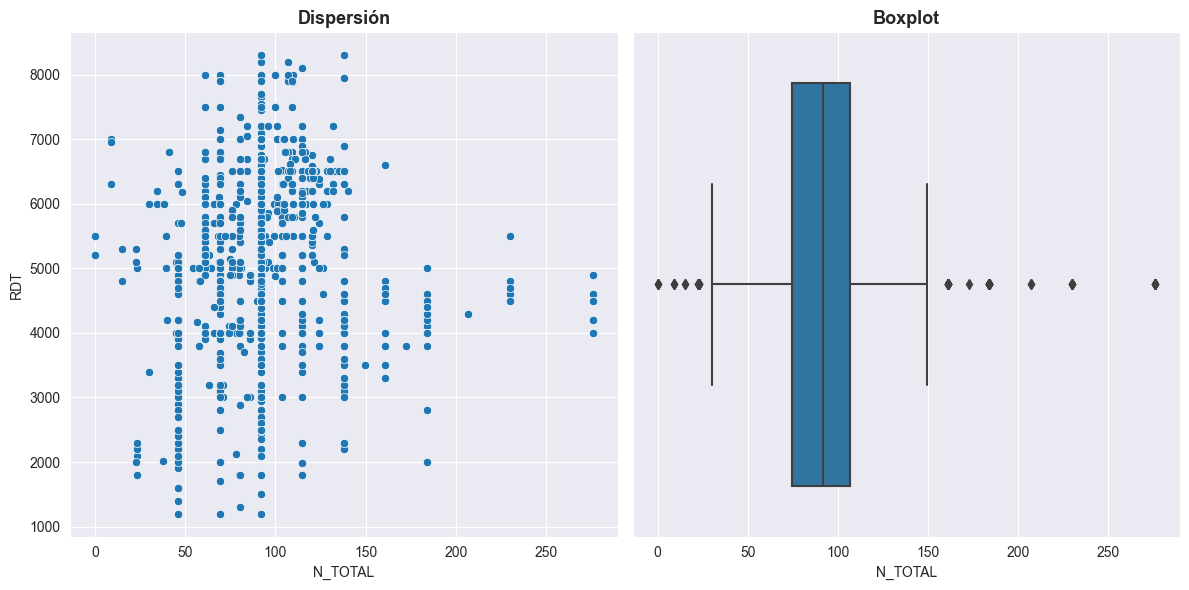

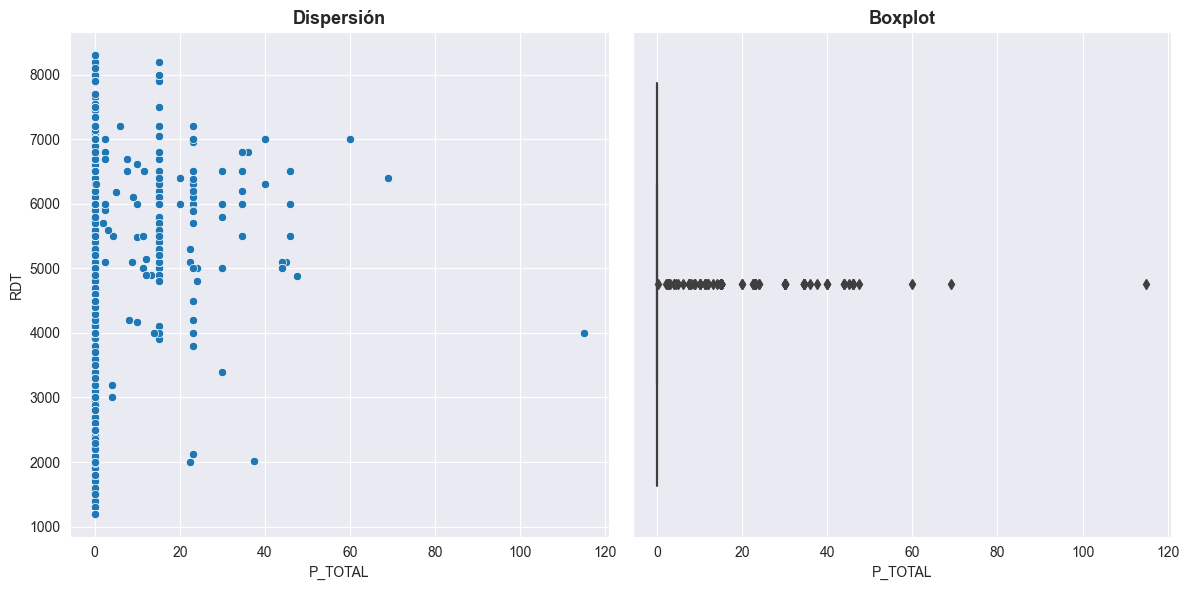

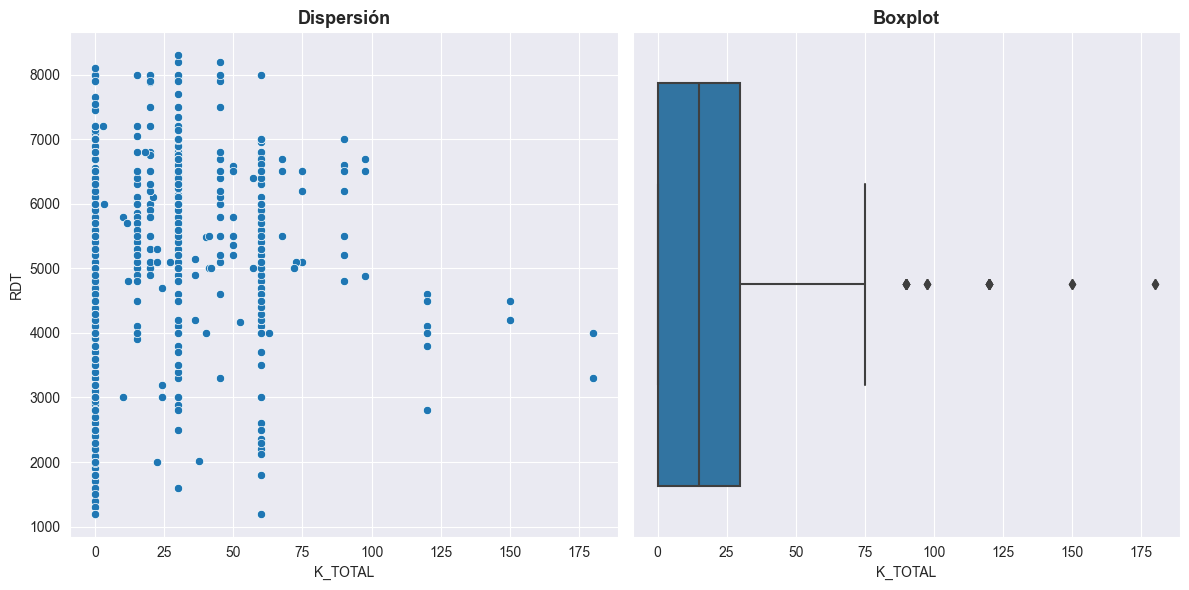

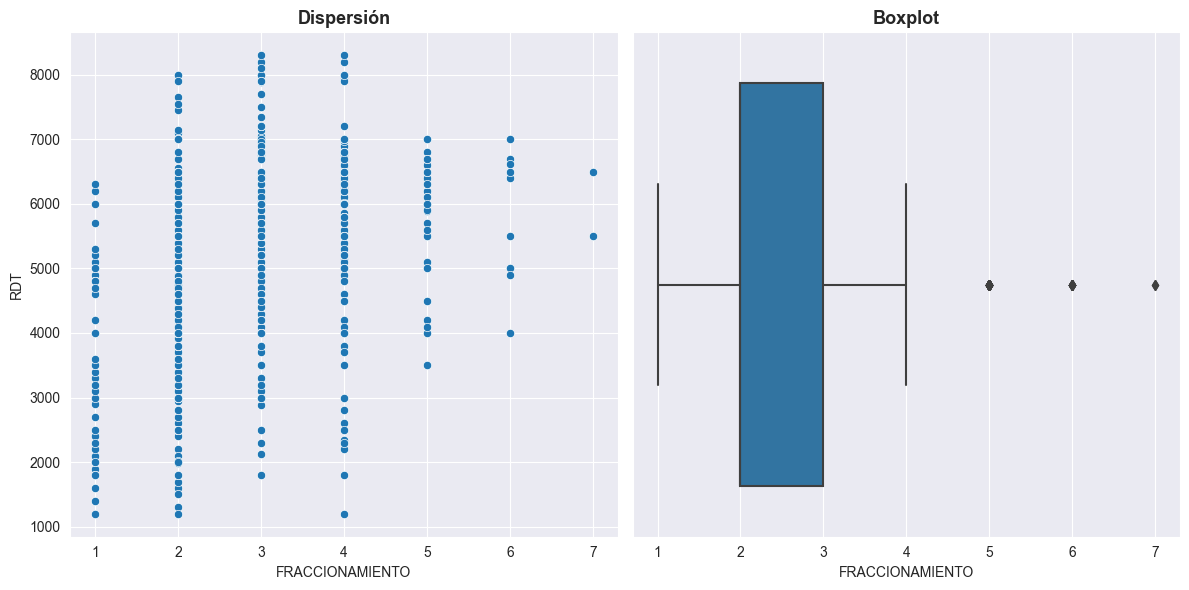

In [63]:
# Eliminar eventos sin fertilizacion quimica (se hizo organica) para no alterar el peso de la variable
fertilizaciones[fertilizaciones['PROD_QUIM'].isna()]
fertilizaciones = fertilizaciones.dropna(subset=['PROD_QUIM'])
fertilizaciones = fertilizaciones[['ID_EVENTO', 'N_TOTAL', 'P_TOTAL', 'K_TOTAL', 'FRACCIONAMIENTO']]
data = pd.merge(data, fertilizaciones, on='ID_EVENTO', how='left')

# Eliminar eventos sin fertilizacion, es muy poco probable que esto ocurra
data = data.dropna()

desc(data, 'N_TOTAL')
desc(data, 'P_TOTAL')
desc(data, 'K_TOTAL')
desc(data, 'FRACCIONAMIENTO')

del fertilizaciones

5. Monitoreos

In [64]:
monitoreos = pd.read_excel('Monitoreo.xlsx', sheet_name=0)
monitoreos = monitoreos[monitoreos['ID_EVENTO'].isin(data['ID_EVENTO'])]
monitoreos = monitoreos.drop_duplicates()
monitoreos['MON_PLAGAS'] = monitoreos.groupby('ID_EVENTO')['TIPO_PLAGA'].transform(lambda x: x.eq('SI').sum())
monitoreos['MON_ENFERMEDADES'] = monitoreos.groupby('ID_EVENTO')['TIPO_ENFERMEDAD'].transform(lambda x: x.eq('SI').sum())
monitoreos['MON_MALEZAS'] = monitoreos.groupby('ID_EVENTO')['TIPO_MALEZA'].transform(lambda x: x.eq('SI').sum())
monitoreos = monitoreos.drop_duplicates(subset='ID_EVENTO')
list(monitoreos)

['USUARIO',
 'ID_EVENTO',
 'PRODUCTOR',
 'PROD_CEDULA',
 'ID_PROD',
 'FECHA_MONITOREO',
 'TIPO_PLAGA',
 'NAME_PLAGA',
 'INCIDENCIA_PLAGA',
 'TIPO_ENFERMEDAD',
 'NAME_ENFERMEDAD',
 'INCIDENCIA_ENFERMEDAD',
 'TIPO_MALEZA',
 'NAME_MALEZA',
 'INCIDENCIA_MALEZA',
 'DESC',
 'MON_PLAGAS',
 'MON_ENFERMEDADES',
 'MON_MALEZAS']

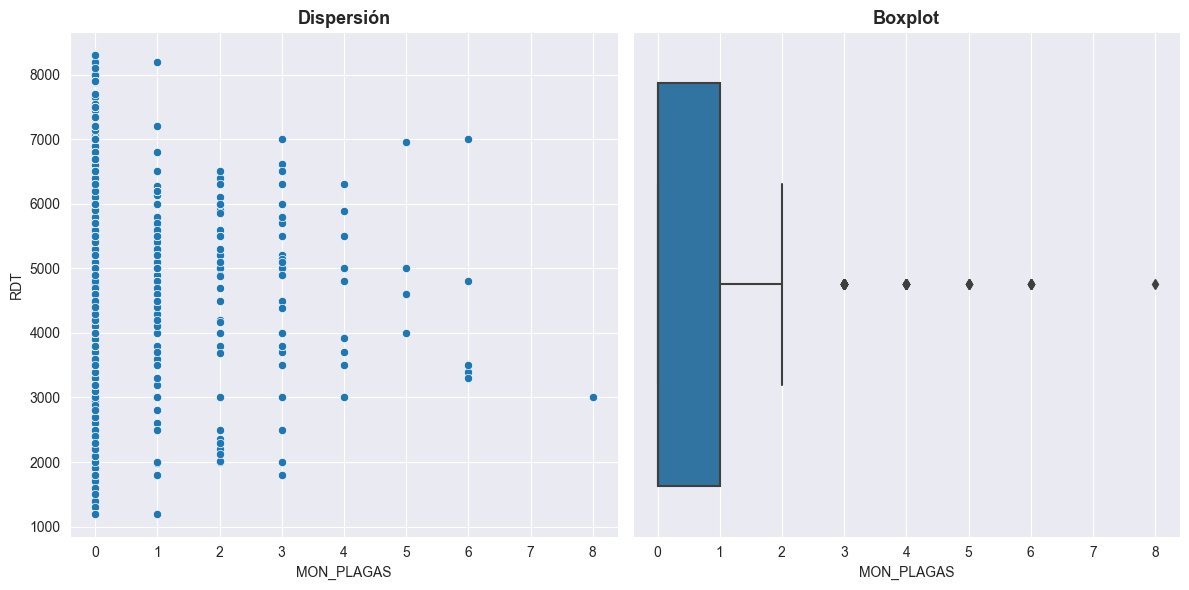

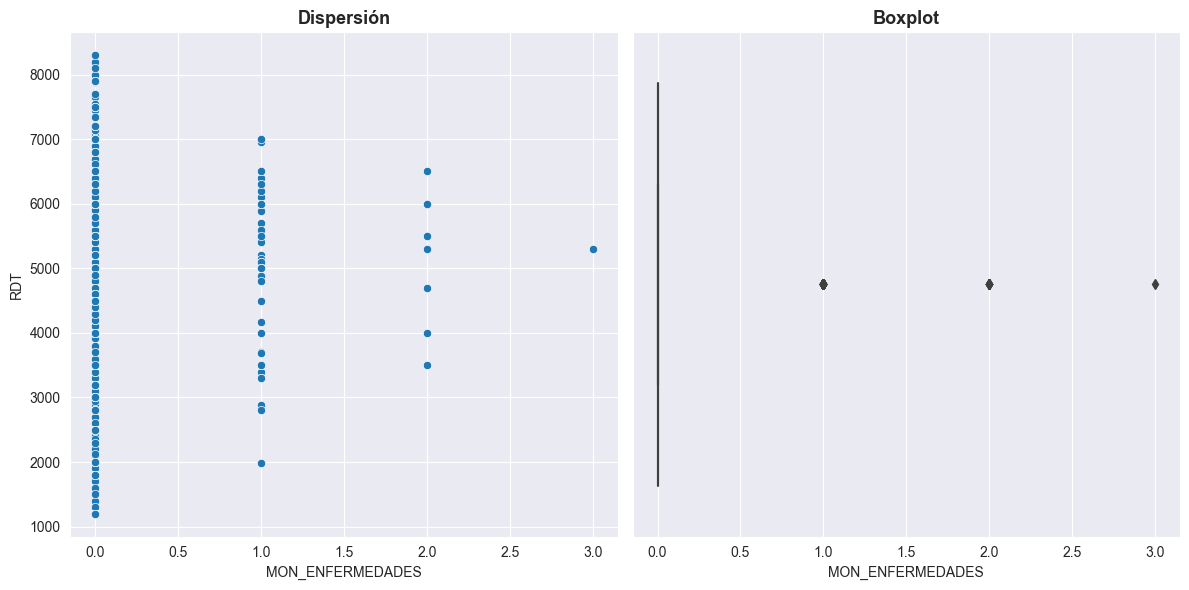

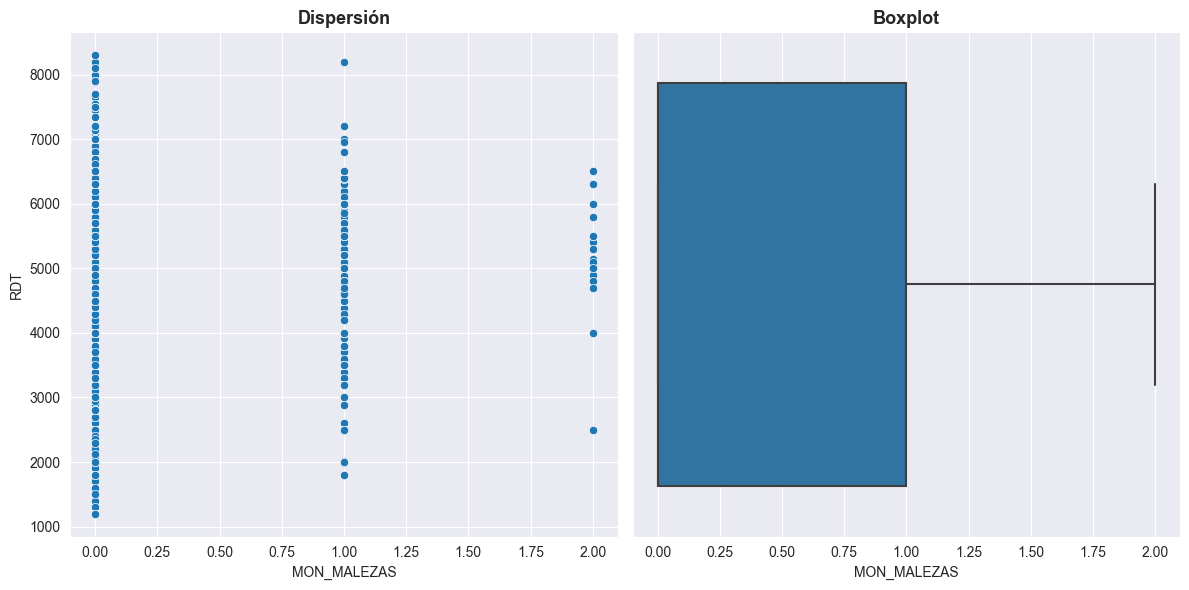

In [65]:
monitoreos = monitoreos[['ID_EVENTO', 'MON_PLAGAS', 'MON_ENFERMEDADES', 'MON_MALEZAS']]
data = pd.merge(data, monitoreos, on='ID_EVENTO', how='left')

# Asumiendo que en los faltantes es que no se hizo la labor
data = data.fillna(0)

desc(data, 'MON_PLAGAS')
desc(data, 'MON_ENFERMEDADES')
desc(data, 'MON_MALEZAS')

del monitoreos

6. Controles

In [67]:
controles = pd.read_excel('Controles.xlsx', sheet_name=0)
controles = controles[controles['ID_EVENTO'].isin(data['ID_EVENTO'])]
controles = controles.drop_duplicates()
controles['CONT_PLAGAS'] = controles.groupby('ID_EVENTO')['TIPO_OBJETIVO'].transform(lambda x: x.eq('Plagas').sum())
controles['CONT_ENFERMEDADES'] = controles.groupby('ID_EVENTO')['TIPO_OBJETIVO'].transform(lambda x: x.eq('Enfermedades').sum())
controles['CONT_MALEZAS'] = controles.groupby('ID_EVENTO')['TIPO_OBJETIVO'].transform(lambda x: x.eq('Malezas').sum())
controles = controles.drop_duplicates(subset='ID_EVENTO')

list(controles)

['USUARIO',
 'ID_EVENTO',
 'FORMA_APLICACION',
 'UNIDAD_DOSIS',
 'OBJ_CONTROL_ENFERMEDAD',
 'OBJ_CONTROL_PLAGA',
 'OBJ_CONTROL_MALEZA',
 'PRODUCTOR',
 'PROD_CEDULA',
 'ID_PROD',
 'FECHA_CONTROL',
 'TIPO_OBJETIVO',
 'TIPO_CONTROL',
 'MOLECULA ACTIVA',
 'ID_ORG',
 'DOSIS',
 'COMENTARIOS',
 'COSTO_INSUMO',
 'COSTO_APLICACION',
 'CONT_PLAGAS',
 'CONT_ENFERMEDADES',
 'CONT_MALEZAS']

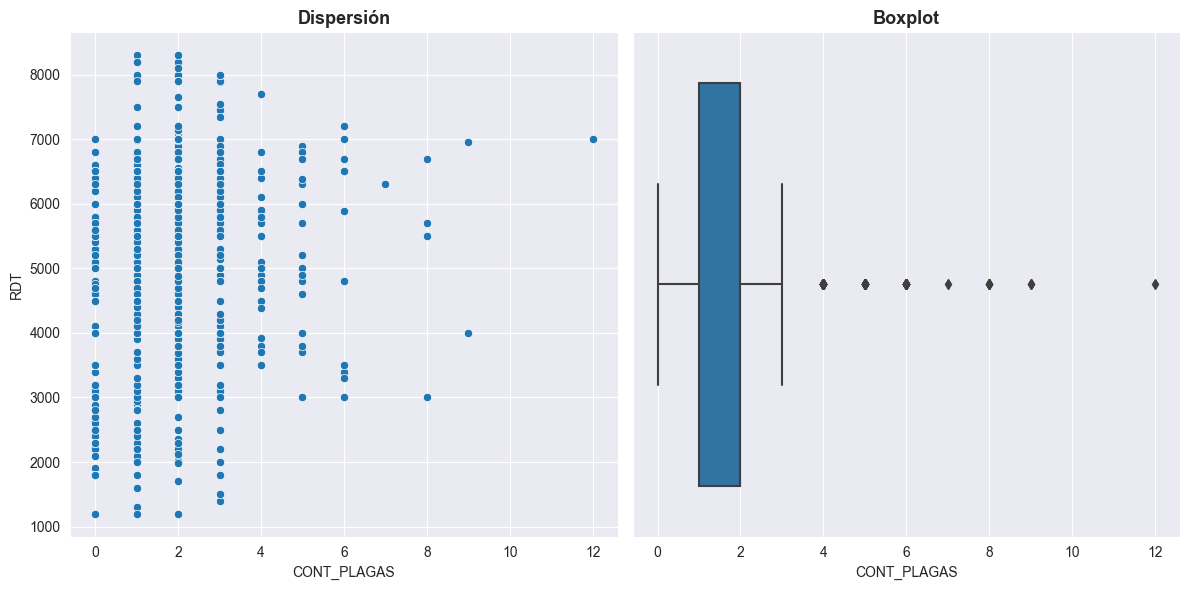

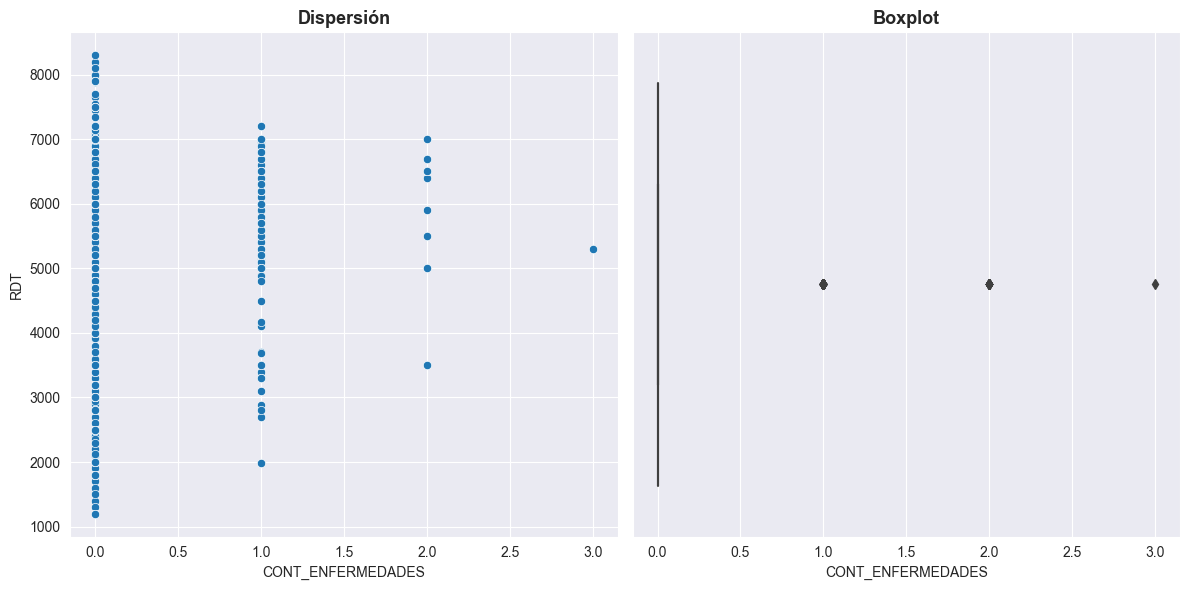

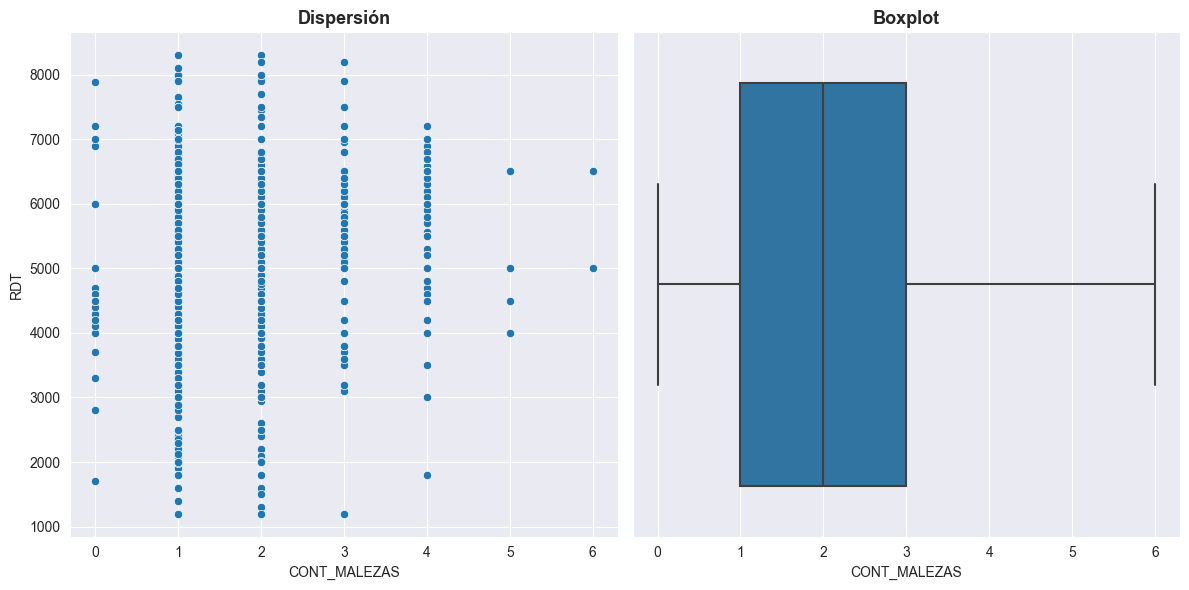

In [68]:
controles = controles[['ID_EVENTO', 'CONT_PLAGAS', 'CONT_ENFERMEDADES', 'CONT_MALEZAS']]
data = pd.merge(data, controles, on='ID_EVENTO', how='left')
desc(data, 'CONT_PLAGAS')
desc(data, 'CONT_ENFERMEDADES')
desc(data, 'CONT_MALEZAS')

del controles

data = data.dropna()

7. RASTAS

In [69]:
rastas = pd.read_excel('Rastas.xls', sheet_name=0)
rastas = rastas[rastas['ID_LOTE'].isin(data['ID_LOTE'])]
rastas = rastas.drop_duplicates()

# Guarda datos para proceso en R
#rastas.to_csv('Rastas_Cordoba.csv', index=False)

# Calculo de Profundidad efectiva
# Suma espesores de cada perfil
rastas['prof_calicata'] = rastas['ESPESORES'].apply(lambda x: sum(map(int, x.split(","))) if pd.notnull(x) else np.nan)

rastas['prof_minima'] = rastas[['PROF_CAPA_ENDURECIDA', 'PROF_MOTEADOS', 'PROF_CARBONATOS',
                   'PROF_HORIZONTE_PEDREGOSO']].min(axis=1)

# Si no hay una minima entonces es la profundidad de la calicata
rastas['prof_minima'] = np.where(rastas['prof_minima'].isna(), rastas['prof_calicata'], rastas['prof_minima'])

rastas['PROF_EFECTIVA'] = rastas.apply(lambda row: row['prof_minima'] if row['prof_minima'] >
                                       row['PROF_RAICES'] else row['PROF_RAICES'] , axis=1)

rastas['PROF_EFECTIVA'] = rastas.apply(lambda row: row['prof_minima'] if row['RAICES_VIVAS'] == 'NO'
                                       else row['PROF_EFECTIVA'], axis=1)

# Esto no lo implementaron en R
rastas['PROF_EFECTIVA'] = rastas.apply(lambda row: 0 if (row['ESTRUCTURA'] == 'MASIVA' or row['ESTRUCTURA'] == 'LAMINAR')
                                       else row['PROF_EFECTIVA'], axis=1)

# Selecciona solo la primera textura
rastas['TEXTURA'] = rastas['TEXTURAS'].str.split(',').str[0]


# Lee archivo generado en R con Materia Organica
inferidas_R = pd.read_csv('rasta_inferidas_maiz_CORDOBA.csv')

# Función para seleccionar la materia organica clasificada superior
def seleccionar_palabra(cadena):
    palabras = cadena.split(',')
    if palabras[0] != 'NO CLASIFICADA':
        return palabras[0]
    for i in range(1, len(palabras)):
        if palabras[i] != 'NO CLASIFICADA':
            return palabras[i]
    return palabras[0]    

inferidas_R['MATERIA_ORGANICA'] = inferidas_R['materia_organica'].apply(seleccionar_palabra)

inferidas_R = inferidas_R[['ID_LOTE', 'MATERIA_ORGANICA']]

rastas = pd.merge(rastas, inferidas_R, on='ID_LOTE', how='left')

list(rastas)

['ID_RASTA',
 'ID_LOTE',
 'ID_FINCA',
 'ID_PROD',
 'USUARIO',
 'PENDIENTE',
 'TERRENO',
 'POSICION',
 'CAPAS',
 'ESPESORES',
 'COLORES_SECOS',
 'COLORES_HUMEDOS',
 'TEXTURAS',
 'RESISTENCIAS',
 'PH',
 'CARBONATOS',
 'PROF_CARBONATOS',
 'PIEDRAS_SUPERFICIE',
 'ROCAS_SUPERFICIE',
 'PIEDRAS_PERFIL',
 'ROCAS_PERFIL',
 'HORIZONTE_PEDREGOSO',
 'PROF_HORIZONTE_PEDREGOSO',
 'ESP_HORIZONTE_PEDREGOSO',
 'PROF_PRIMERAS_PIEDRAS',
 'CAPAS_ENDURECIDAS',
 'PROF_CAPA_ENDURECIDA',
 'ESP_CAPA_ENDURECIDA',
 'MOTEADOS',
 'PROF_MOTEADOS',
 'MOTEADOS_70CM',
 'ESTRUCTURA',
 'EROSION',
 'MOHO',
 'COSTRAS_DURAS',
 'EXPOSICION_SOL',
 'COSTRAS_BLANCAS',
 'COSTRAS_NEGRAS',
 'REGION_SECA',
 'RAICES_VIVAS',
 'PROF_RAICES',
 'PLANTAS_PEQUEÑAS',
 'HOJARASCA',
 'SUELO_NEGRO_BLANDO',
 'CUCHILLO_PR_HORIZONTE',
 'CERCA_RIOS_QUEBRADAS',
 'RECUBRIMIENTO_VEGETAL',
 'prof_calicata',
 'prof_minima',
 'PROF_EFECTIVA',
 'TEXTURA',
 'MATERIA_ORGANICA']

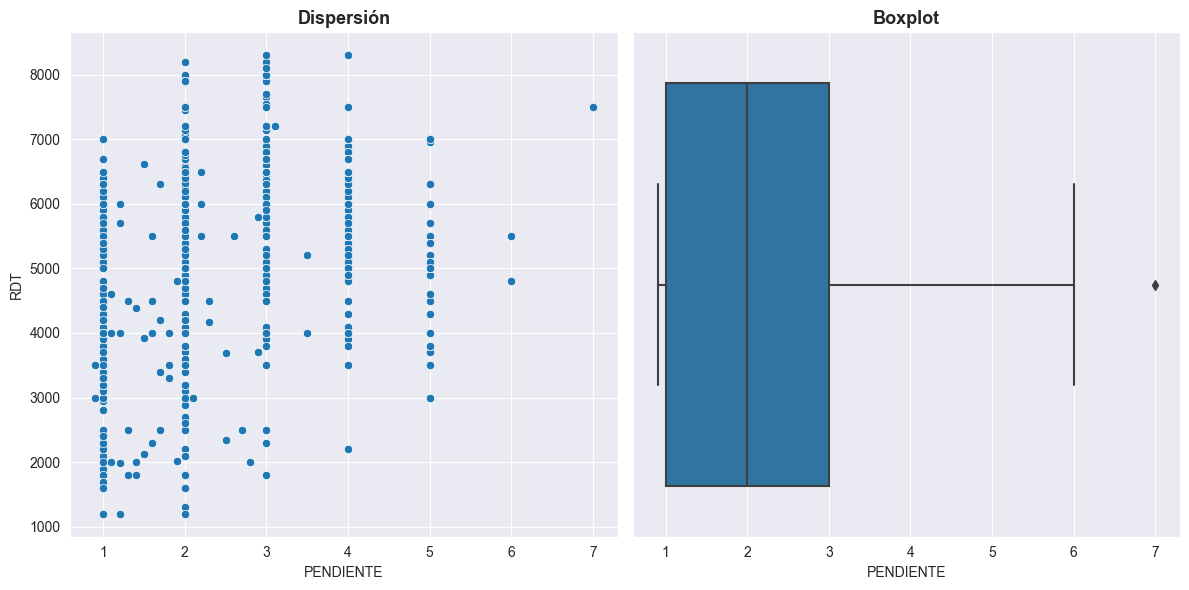

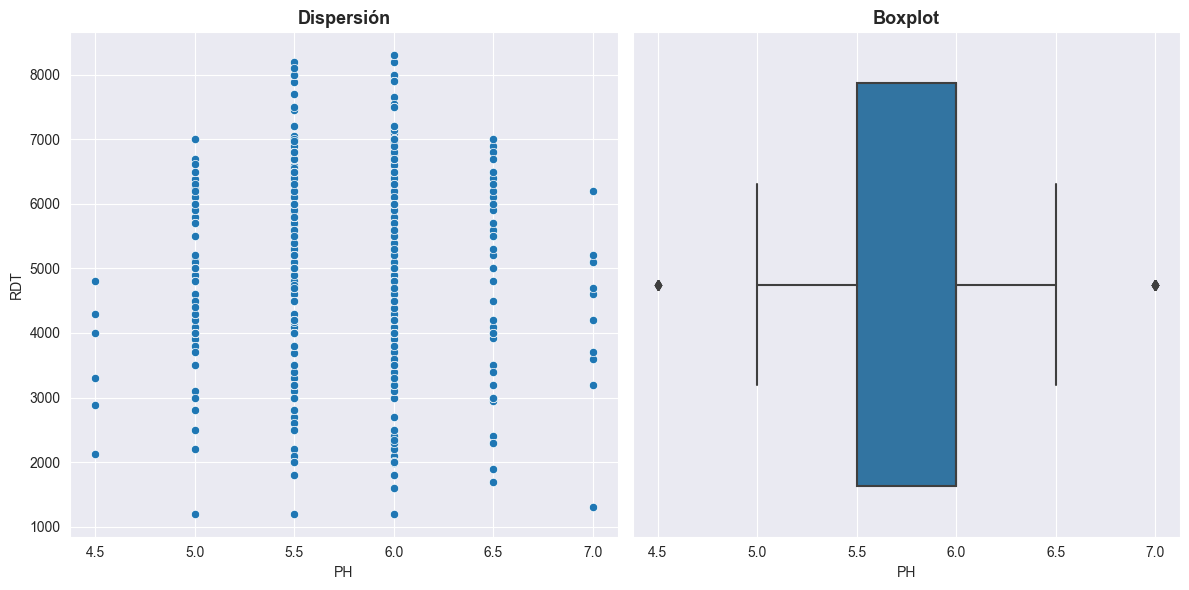

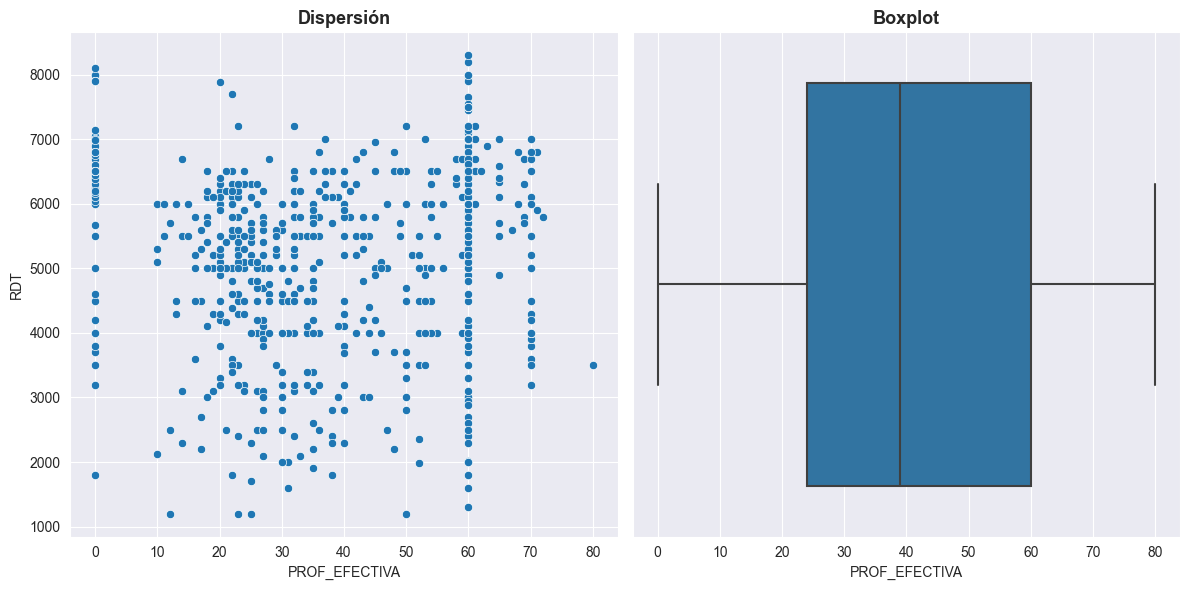

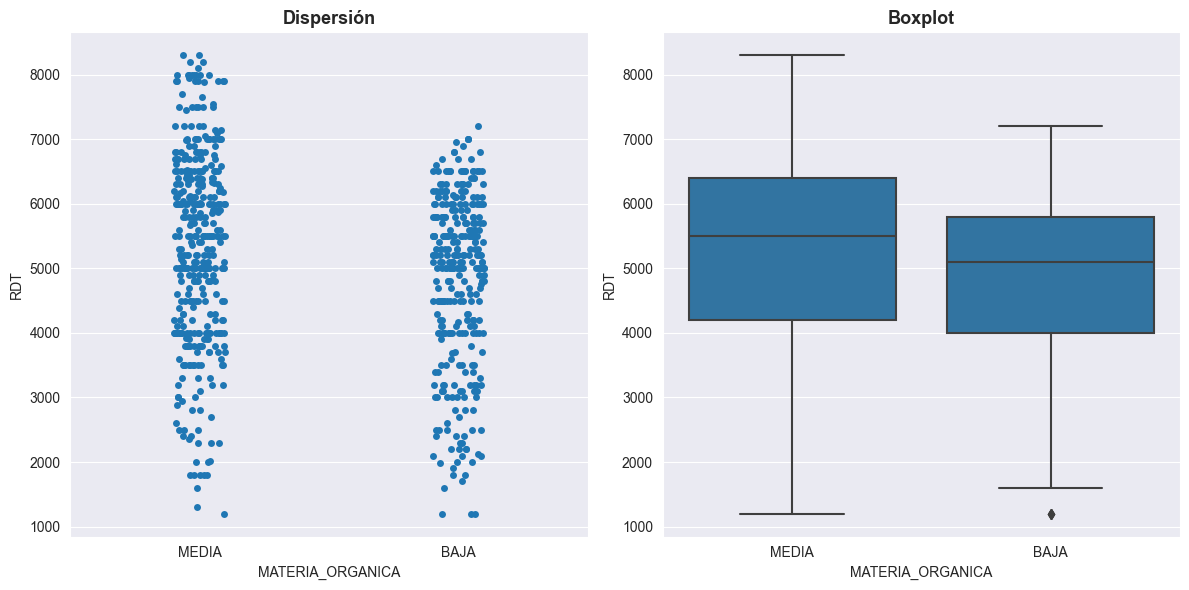

In [70]:
rastas = rastas[['ID_LOTE', 'PENDIENTE', 'PH', 'TEXTURA', 'ESTRUCTURA', 'PROF_EFECTIVA', 'MATERIA_ORGANICA']]

rastas = rastas.dropna()
rastas = rastas[rastas['MATERIA_ORGANICA'] != 'NO CLASIFICADA']
rastas = rastas[rastas['MATERIA_ORGANICA'] != 'EE.ND']
rastas = rastas.drop_duplicates(subset = 'ID_LOTE')
data = pd.merge(data, rastas, on='ID_LOTE', how='left')

data = data.dropna()

desc(data, 'PENDIENTE')
desc(data, 'PH')
desc(data, 'PROF_EFECTIVA')
desc(data, 'MATERIA_ORGANICA')

del rastas

Guardado

['ID_EVENTO', 'ID_LOTE', 'LAT_LOTE', 'LONG_LOTE', 'MANEJO_RAST', 'TIPO_PREP', 'NUM_PASES_PREP', 'PROF_PREP', 'DRENAJE', 'FECHA_SIEMBRA', 'TIPO_SIEMBRA', 'CANT_SEMILLAS', 'SEM_TRATADAS', 'TIPO_MATERIAL', 'MATERIAL_GENETICO', 'COLOR_ENDOSPERMO', 'FECHA_EMERGENCIA', 'POB_20D', 'FECHA_FLORACION', 'N_TOTAL', 'P_TOTAL', 'K_TOTAL', 'FRACCIONAMIENTO', 'MON_PLAGAS', 'MON_ENFERMEDADES', 'MON_MALEZAS', 'CONT_PLAGAS', 'CONT_ENFERMEDADES', 'CONT_MALEZAS', 'PENDIENTE', 'PH', 'TEXTURA', 'ESTRUCTURA', 'PROF_EFECTIVA', 'MATERIA_ORGANICA', 'METODO_COSECHA', 'FECHA_COSECHA', 'RDT']


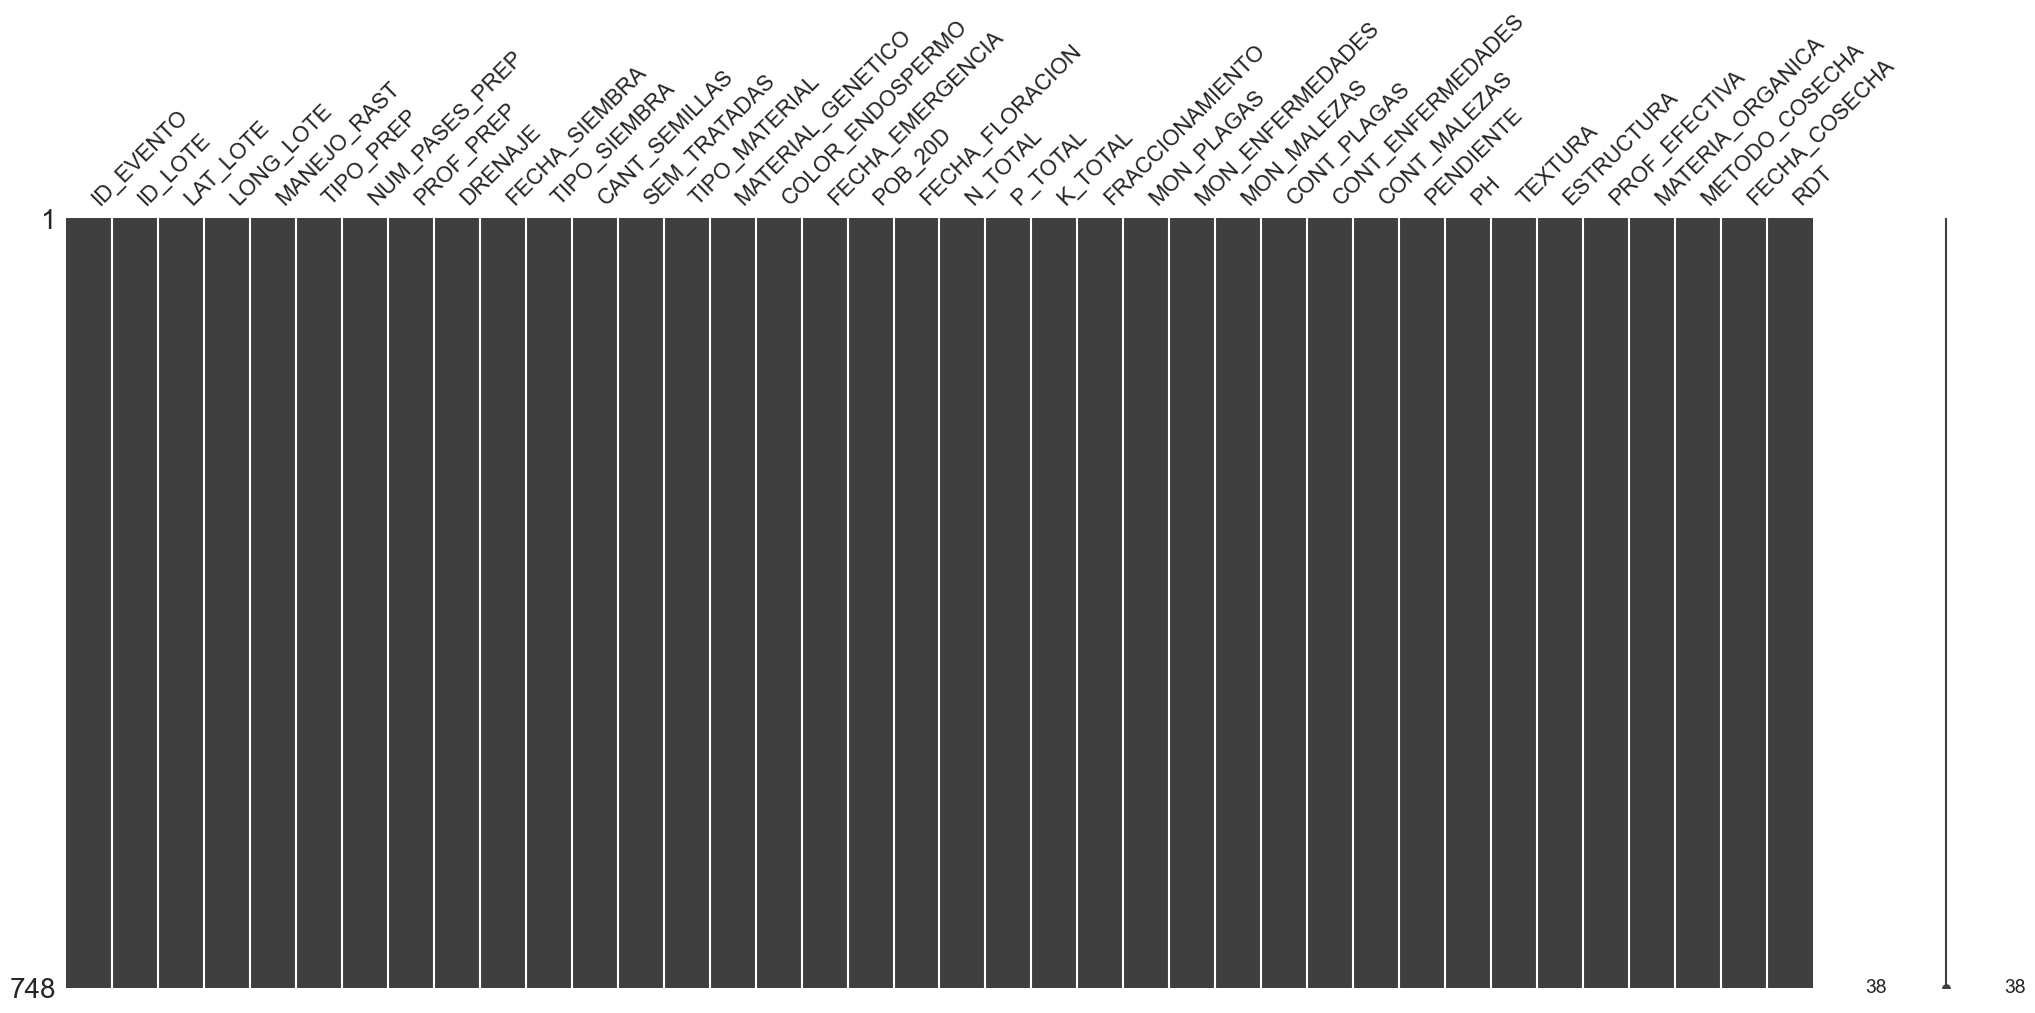

In [72]:
print(list(data))
msno.matrix(data);
data = data[['ID_EVENTO', 'ID_LOTE', 'LAT_LOTE', 'LONG_LOTE', 'MANEJO_RAST', 'TIPO_PREP', 'NUM_PASES_PREP',
             'PROF_PREP', 'DRENAJE', 'FECHA_SIEMBRA', 'TIPO_SIEMBRA', 'CANT_SEMILLAS', 'SEM_TRATADAS',
             'TIPO_MATERIAL', 'MATERIAL_GENETICO', 'COLOR_ENDOSPERMO', 'FECHA_EMERGENCIA', 'POB_20D',
             'FECHA_FLORACION', 'N_TOTAL', 'P_TOTAL', 'K_TOTAL', 'FRACCIONAMIENTO', 'MON_PLAGAS',
             'MON_ENFERMEDADES', 'MON_MALEZAS', 'CONT_PLAGAS', 'CONT_ENFERMEDADES', 'CONT_MALEZAS',
             'PENDIENTE', 'PH', 'TEXTURA', 'ESTRUCTURA', 'PROF_EFECTIVA', 'MATERIA_ORGANICA',
             'METODO_COSECHA', 'FECHA_COSECHA', 'RDT']]

data.to_csv('Data_Cordoba_final_test.csv', index=False)